In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime

In [2]:
from debug import local_settings, timeifdebug, timeargsifdebug, frame_splain

In [3]:
df = pd.read_csv('activities.csv')

In [4]:
df.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,4/26/18,"2,635","2,931",1.38,2,"1,347",93,0,0,566
1,4/27/18,"3,649","9,971",4.70,19,"1,158",219,46,17,"1,752"
2,4/28/18,"3,379","3,521",1.66,2,702,155,22,11,"1,124"
3,4/29/18,"2,851","1,639",0.77,0,891,122,0,0,602
4,4/30/18,"2,825","1,323",0.62,0,880,104,0,0,540


In [5]:
df.Date.value_counts().sort_values(ascending=False).head()

5/11/18    1
6/6/18     1
9/13/18    1
6/2/18     1
5/13/18    1
Name: Date, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null object
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 17.7+ KB


In [7]:
df.Date=pd.to_datetime(df.Date, format='%m/%d/%y')
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
Date                      225 non-null datetime64[ns]
Calories Burned           225 non-null object
Steps                     225 non-null object
Distance                  225 non-null float64
Floors                    225 non-null int64
Minutes Sedentary         225 non-null object
Minutes Lightly Active    225 non-null int64
Minutes Fairly Active     225 non-null int64
Minutes Very Active       225 non-null int64
Activity Calories         225 non-null object
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [8]:
dmax = df.Date.max()
dmin = df.Date.min()
dmax - dmin + timedelta(days=1)

Timedelta('225 days 00:00:00')

In [9]:
df = df.set_index('Date')

In [10]:
df.dtypes

Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [11]:
df['Calories Burned'] = df['Calories Burned'].str.replace(',','').astype(int)
df['Steps'] = df['Steps'].str.replace(',','').astype(int)
df['Minutes Sedentary'] = df['Minutes Sedentary'].str.replace(',','').astype(int)
df['Activity Calories'] = df['Activity Calories'].str.replace(',','').astype(int)

In [12]:
df = df.rename(columns={
    'Calories Burned': 'cals_burned',
    'Steps': 'steps',
    'Distance': 'dist',
    'Floors': 'flrs',
    'Minutes Sedentary': 'mins_sed',
    'Minutes Lightly Active': 'mins_light',
    'Minutes Fairly Active': 'mins_mod',
    'Minutes Very Active': 'mins_heavy',
    'Activity Calories': 'activity_cals',
})

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB


In [13]:
df['mins_tot'] = df.mins_sed + df.mins_light + df.mins_mod + df.mins_heavy
df.head()

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot
Date,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984


In [14]:
df['mins_off'] = 1440 - df.mins_tot
df.head(5)

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
Date,,,,,,,,,,,
2018-04-26,2635,2931,1.38,2,1347,93,0,0,566,1440,0
2018-04-27,3649,9971,4.70,19,1158,219,46,17,1752,1440,0
2018-04-28,3379,3521,1.66,2,702,155,22,11,1124,890,550
2018-04-29,2851,1639,0.77,0,891,122,0,0,602,1013,427
2018-04-30,2825,1323,0.62,0,880,104,0,0,540,984,456


In [15]:
import wrangle_fitbit as wf

In [16]:
df = wf.get_activities_data()
frame_splain(df, splain=True, maxcols=15)

DATAFRAME SHAPE:
(225, 11)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 11 columns):
cals_burned      225 non-null int64
steps            225 non-null int64
dist             225 non-null float64
flrs             225 non-null int64
mins_sed         225 non-null int64
mins_light       225 non-null int64
mins_mod         225 non-null int64
mins_heavy       225 non-null int64
activity_cals    225 non-null int64
mins_tot         225 non-null int64
mins_off         225 non-null int64
dtypes: float64(1), int64(10)
memory usage: 21.1 KB
None

DATAFRAME DESCRIPTION:
               count         mean          std    min      25%      50%  \
cals_burned    225.0  3401.911111   632.426578  799.0  3069.00  3385.00   
steps          225.0  8536.186667  5255.746608    0.0  4714.00  7806.00   
dist           225.0     4.046800     2.506253    0.0     2.22     3.68   
flrs           225.0    12.591111    25.844174    0.0

In [17]:
df.head().T

date,2018-04-26 00:00:00,2018-04-27 00:00:00,2018-04-28 00:00:00,2018-04-29 00:00:00,2018-04-30 00:00:00
cals_burned,2635.00,3649.0,3379.00,2851.00,2825.00
steps,2931.00,9971.0,3521.00,1639.00,1323.00
dist,1.38,4.7,1.66,0.77,0.62
flrs,2.00,19.0,2.00,0.00,0.00
mins_sed,1347.00,1158.0,702.00,891.00,880.00
mins_light,93.00,219.0,155.00,122.00,104.00
mins_mod,0.00,46.0,22.00,0.00,0.00
mins_heavy,0.00,17.0,11.00,0.00,0.00
activity_cals,566.00,1752.0,1124.00,602.00,540.00
mins_tot,1440.00,1440.0,890.00,1013.00,984.00


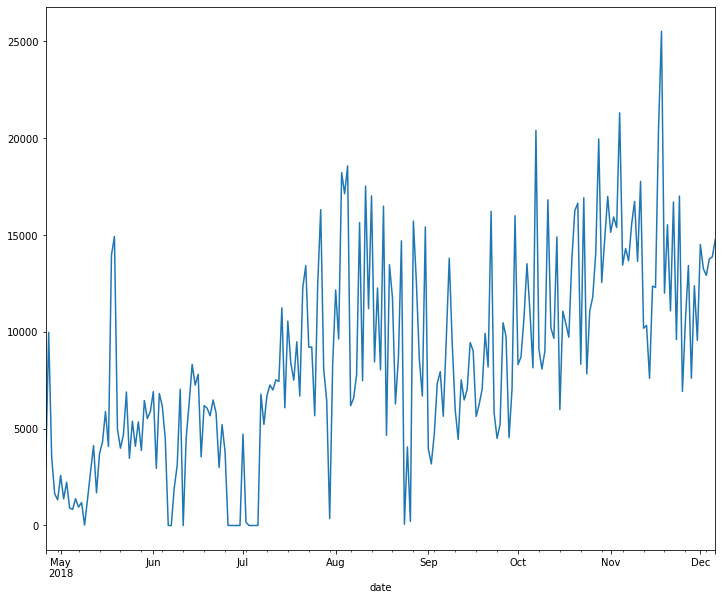

In [21]:
plt.figure(figsize=(12,10))
df.steps.plot()
plt.show()

In [22]:
df[df.steps==0]

,cals_burned,steps,dist,flrs,mins_sed,mins_light,mins_mod,mins_heavy,activity_cals,mins_tot,mins_off
date,,,,,,,,,,,
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,1440,0
2018-06-29,2180,0,0.0,0,1437,3,0,0,39,1440,0
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,1440,0
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,1440,0
